# Veri Bilimi İçin İstatistik

# Örnek Teorisi

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import researchpy as rp
import statsmodels.stats.api as sms
from scipy.stats import bernoulli
from scipy.stats import binom
from scipy.stats import poisson
import scipy.stats as stats
from scipy.stats import shapiro
import pylab
from statsmodels.stats.descriptivestats import sign_test
from scipy.stats import norm
from statsmodels.stats.proportion import proportions_ztest as propz
from scipy.stats import f_oneway
from scipy.stats import kruskal
from scipy.stats import pearsonr

from warnings import filterwarnings
filterwarnings("ignore")

In [5]:
populasyon = np.random.randint(0,80,10000)

In [6]:
populasyon

array([27, 17, 14, ..., 64, 40, 31])

In [7]:
populasyon[0:10]

array([27, 17, 14, 27,  5, 27, 37, 45, 78, 39])

In [8]:
# Örneklem Çekimi
np.random.seed(115)
orneklem = np.random.choice(a = populasyon, size = 100)
orneklem[0:10]

array([25, 21, 73, 47, 38, 54, 48, 47, 22, 12])

In [9]:
orneklem.mean()

38.5

In [10]:
populasyon.mean()

39.531

In [11]:
# Örneklem Dağılımı

In [12]:
np.random.seed(10)
orneklem1 = np.random.choice(a = populasyon, size = 100)
orneklem2 = np.random.choice(a = populasyon, size = 100)
orneklem3 = np.random.choice(a = populasyon, size = 100)
orneklem4 = np.random.choice(a = populasyon, size = 100)
orneklem5 = np.random.choice(a = populasyon, size = 100)
orneklem6 = np.random.choice(a = populasyon, size = 100)
orneklem7 = np.random.choice(a = populasyon, size = 100)
orneklem8 = np.random.choice(a = populasyon, size = 100)
orneklem9 = np.random.choice(a = populasyon, size = 100)
orneklem10 = np.random.choice(a = populasyon, size = 100)

In [13]:
(orneklem1.mean()+orneklem2.mean()+orneklem3.mean()+orneklem4.mean()+orneklem5.mean()+
orneklem6.mean()+orneklem7.mean()+orneklem8.mean()+orneklem9.mean()+orneklem10.mean())/10

39.376

In [14]:
orneklem1.mean()

38.94

In [15]:
orneklem2.mean()

36.64

# Betimsel İstatistikler

In [16]:
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [18]:
# !pip install researchpy

In [19]:
rp.summary_cont(df[["total_bill","tip","size"]])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,total_bill,244.0,19.7859,8.9024,0.5699,18.6633,20.9086
1,tip,244.0,2.9983,1.3836,0.0886,2.8238,3.1728
2,size,244.0,2.5697,0.9511,0.0609,2.4497,2.6896


In [20]:
rp.summary_cat(df[["sex","smoker","day"]])

,Variable,Outcome,Count,Percent
0,sex,Male,157,64.34
1,,Female,87,35.66
2,smoker,No,151,61.89
3,,Yes,93,38.11
4,day,Sat,87,35.66
5,,Sun,76,31.15
6,,Thur,62,25.41
7,,Fri,19,7.79


In [21]:
df[["tip","total_bill"]].cov()

,tip,total_bill
tip,1.914455,8.323502
total_bill,8.323502,79.252939


In [22]:
df[["tip","total_bill"]].corr()

,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


# İş Uygulaması: Fiyat Stratejisi Karar Destek

CEO fiyat belirleme konusunda bilimsel bir dayanak ve esneklik istiyor
* Satıcı, alıcı ve bir ürün var
* Alıcılara ürüne ne kadar ücret öderdiniz diye soruluyor
* Optimum fiat bilimsel ve esnek olarak bulunmak isteniyor

In [23]:
fiyatlar = np.random.randint(10,110,1000)

In [24]:
fiyatlar.mean()

58.492

In [25]:
sms.DescrStatsW(fiyatlar).tconfint_mean()

(56.67953887736034, 60.30446112263965)

**En iyi fiyat aralığı**

# Olasılık Dağılımları

## Bernoulli Dağılımı

Başarılı-başarısız, olumlu-olumsuz şeklindeki iki sonuçlu olaylar ile ilgilenildiğinde kullanılan kesikli olasılık dağılımıdır


${\displaystyle f(k;p)=p^{k}(1-p)^{1-k}\quad {\text{for }}k\in \{0,1\}}$


${\displaystyle \operatorname {E} \left(X\right)=p}$

$\operatorname {Var} [X]=pq=p(1-p)$

In [26]:
p = 0.6

In [27]:
rv = bernoulli(p)
rv.pmf(k = 1)

0.6

In [28]:
rv = bernoulli(p)
rv.pmf(k = 0)

0.4

## Büyük Sayılar Yasası

**Bir rassal değişkenin uzun vadeli kararlılığını tanımlayan olasılık teoremidir.**

In [29]:
rng = np.random.RandomState(123)
for i in np.arange(1,31):
    deney_sayisi = 2**i
    yazi_turalar = rng.randint(0,2,size = deney_sayisi)
    yazi_olasiliklari = np.mean(yazi_turalar)
    print(f"Atış Sayısı: {deney_sayisi} --- Yazı Olasılığı: {(round(yazi_olasiliklari*100,2))}")

Atış Sayısı: 2 --- Yazı Olasılığı: 50.0
Atış Sayısı: 4 --- Yazı Olasılığı: 0.0
Atış Sayısı: 8 --- Yazı Olasılığı: 62.5
Atış Sayısı: 16 --- Yazı Olasılığı: 43.75
Atış Sayısı: 32 --- Yazı Olasılığı: 46.88
Atış Sayısı: 64 --- Yazı Olasılığı: 56.25
Atış Sayısı: 128 --- Yazı Olasılığı: 50.78
Atış Sayısı: 256 --- Yazı Olasılığı: 52.73
Atış Sayısı: 512 --- Yazı Olasılığı: 52.93
Atış Sayısı: 1024 --- Yazı Olasılığı: 50.2
Atış Sayısı: 2048 --- Yazı Olasılığı: 48.58
Atış Sayısı: 4096 --- Yazı Olasılığı: 49.49
Atış Sayısı: 8192 --- Yazı Olasılığı: 49.58
Atış Sayısı: 16384 --- Yazı Olasılığı: 49.96
Atış Sayısı: 32768 --- Yazı Olasılığı: 50.0
Atış Sayısı: 65536 --- Yazı Olasılığı: 49.68
Atış Sayısı: 131072 --- Yazı Olasılığı: 49.97
Atış Sayısı: 262144 --- Yazı Olasılığı: 50.13
Atış Sayısı: 524288 --- Yazı Olasılığı: 50.01
Atış Sayısı: 1048576 --- Yazı Olasılığı: 50.09
Atış Sayısı: 2097152 --- Yazı Olasılığı: 50.01
Atış Sayısı: 4194304 --- Yazı Olasılığı: 50.03
Atış Sayısı: 8388608 --- Yazı Olasılığ

## Binom Dağılımı

Binom dağılımı, bağımsız n deneme sonucu k başarılı olma olasılığı ile ilgilenildiğinde kullanılan dağılımdır


${\displaystyle f(k;n,p)={n \choose k}p^{k}(1-p)^{n-k}}$, k = 0, 1, 2, ...,n


${\displaystyle \operatorname {E} (X)=np}$


${\displaystyle \operatorname {Var} (X)=np(1-p)}$

Örnek:
Bir madeni para 4 kere atılıyor 2 kere yazı gelmesi olasılığı nedir?


${\displaystyle f(2;4,0.5)={4 \choose 2}0.5^{2}(1-0.5)^{4-2}=0.375}$

* Bir mecrada reklam verilecek
* Dağılım ve reklama tıklama olasılığı biliniyor (0.01)
* Reklamı 100 kişi gördüğünde 1,5,10 defa tıklanma olasılığı nedir?

${\displaystyle f(1;100,0.01)={100 \choose 1}0.01^{2}(1-0.01)^{100-1}}$ = 0.37

${\displaystyle f(5;100,0.01)}$ = 0.00289779

${\displaystyle f(10;100,0.01)}$ = 0.00000007

In [30]:
p = 0.01
n = 100
rv = binom (n,p)
print(rv.pmf(1))
print(rv.pmf(5))
print(rv.pmf(10))

0.36972963764972666
0.002897787123761478
7.006035693977194e-08


## Poisson Dağılımı


Belirli bir zaman aralığında belirli bir alanda nadiren rastlanan olayların olasılıklarını hesaplamak için kullanılır


${\displaystyle f(x,\lambda )={\frac {\lambda ^{x}e^{-\lambda }}{x!}}\,\!}$,  x = 0,1,2,...,n


${\displaystyle E(X)=\lambda}$<br>
${\displaystyle Var(X)=\lambda}$

Lambda: Beklenen sonucun ortalama gerçekleşme sayısı

**Örnek Olaylar**
* 10 bin kelimeden oluşan bir kitapta hatalı kelime sayısı
* 4000 öğrencili okulda not girişinde hata olması
* Bir iş gününde çağrı merkezine gelen taktir sayısı
* Kredi kartı işlemlerinde sahtekarlık olması
* Rötara düşen uçuş sefer sayısı
<br><br>
n = Gözlem sayısı : büyük olmalıdır<br>
p = Olasılık : küçük küçük olmalıdır<br><br>
Genel kabul gören şekliyle<br>
n > 50
n*p(lambda) < 5 olmalıdır
<br><br><br>
Örnek: Bir üniversitede 5000 not girişinde 5 tane notun yanlış girilme olasılığı nedir?
<br>
(Dağılım Poisson ve Lambda = 0.2)
<br><br>
${\displaystyle f(5;0.2) = {\frac {{0.2^5}{e^{-0.2}}}{5!}} = 0.00000218328201}$

Hatalı ilan girişi olasılıkları hesaplanma isteniyor
* Bir yıl süresince ölçüm yapılmıyor
* Dağılım biliniyor (Poisson) ve Lambda 0.1 (ortalama hata sayısı)
* Hiç hata olmaması, 3 hata olması ve 5 hata olması olasılıkları nedir?


${\displaystyle f(0; 0.1 )={\frac {0.1 ^{0}e^{-0.1 }}{0!}}\,\!}$ = 0.9048374180


${\displaystyle f(3; 0.1 )={\frac {0.1 ^{3}e^{-0.1 }}{3!}}\,\!}$ = 0.0001508062


${\displaystyle f(5; 0.1 )={\frac {0.1 ^{5}e^{-0.1 }}{5!}}\,\!}$ = 0.0000000754

In [31]:
lambda_ = 0.1

In [32]:
rv = poisson(mu = lambda_)
print(rv.pmf(k = 0))
print(rv.pmf(k = 3))
print(rv.pmf(k = 5))

0.9048374180359595
0.00015080623633932676
7.54031181696634e-08


# Normal Dağılım

**Normal dağıldığı bilinen sürekli rassal değişkenler için olasılık hesaplaması amacıyla kullanılır**

${\displaystyle f(x\mid \mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}}$

* $\mu$  ortalama ya da dağılımın beklenen değeri

* ${\displaystyle \sigma }$  standart sapma

* ${\displaystyle \sigma ^{2}}$ varyans

Bir yatırım/toplantı öncesinde gelecek ay ile ilgili satışların belirli değerlerde gerçekleşmesi olasılıkları belirlenmek isteniyor
* Dağılımın normal olduğu biliniyor
* Aylık ortalama satış sayısı 80K, standart sapması 5K
* 90K'dan fazla satış yapma olasılığı nedir?

90K'dan fazla olma olasılığı

${\displaystyle P(X>90) = 0.0228}$

70K'dan fazla olma olasılığı

${\displaystyle P(X>70) = 0.9772}$

73K'dan az olma olasılığı

${\displaystyle P(X<70) = 0.0808}$

85K ile 90K arasında olma olasılığı

${\displaystyle P(85<X<90) = 0.1359}$

In [33]:
# 90 dan fazla olması
1-norm.cdf(90,80,5)

0.02275013194817921

In [34]:
# 70 den fazla olması
1-norm.cdf(70,80,5)

0.9772498680518208

In [35]:
# 73 den az olması
norm.cdf(73,80,5)

0.08075665923377107

In [36]:
# 85 ile 90 arasında olması
norm.cdf(90,80,5) - norm.cdf(85,80,5)

0.13590512198327787

# Hipotez Testi

Bir inanışı test etmek için kullanılan istatistiksel bir tekniktir
<br><br>
<d><i>H</i><sub>0</sub>: <i>μ</i> = <i>50</i></d><br>
<d><i>H</i><sub>1</sub>: <i>μ</i> ≠ <i>50</i></d><br><br>
<d><i>H</i><sub>0</sub>: <i>μ</i> <= <i>50</i></d><br>
<d><i>H</i><sub>1</sub>: <i>μ</i> > <i>50</i></d><br><br>
<d><i>H</i><sub>0</sub>: <i>μ</i> >= <i>50</i></d><br>
<d><i>H</i><sub>1</sub>: <i>μ</i> < <i>50</i></d><br><br>
**Hipotez Test Sonucu Verilen Kararda**
<br>
**<d><i>H</i><sub>0</sub></d>** **reddedilmedi** ve **doğru** ise: Doğru Karar (1 - ${\displaystyle \alpha}$) -> Güven Düzeyi
<br>
**<d><i>H</i><sub>0</sub></d>** **reddedildi** ve **doğru** ise: I.Tip Hata (${\displaystyle \alpha}$)
<br>
**<d><i>H</i><sub>0</sub></d>** **reddedilmedi** ve **yanlış** ise: II.Tip Hata (${\displaystyle \beta}$)
<br>
**<d><i>H</i><sub>0</sub></d>** **reddedildi** ve **yanlış** ise: Doğru Karar (1 - ${\displaystyle \beta}$) -> Testin Gücü

## p-value (p<0.05)

Hipotez testlerinin sonuçlarını değerlendirmek üzere programlar tarafından p-value değeri verilir.<br>
Bu değer üzerinden kolay yorum yapılabilir

Sepete ürün ekleme işlemi sonrasında ödeme ekranında 5 adım vardır ve bu adımların birisi sorgulanmaktadır

# İş Uygulaması: Ürün Satın Alma Optimizasyonu
* Her adımın 20'şer saniye olması hedefi var. 4.Adım sorgulanıyor.
* Bu durumu test etmek için 100 örnek alınıyor.
* Örnek standart sapması 5 saniyedir. Örnek ortalaması ise 9 saniyedir.

## Hipotez Testi Adımları

**Adım 1:** Hipotezlerin kurulması ve yönerinin belirlenmesi
<br>
<d><i>H</i><sub>0</sub>: <i>μ</i> = <i>50</i></d>   
<d><i>H</i><sub>1</sub>: <i>μ</i> ≠ <i>50</i></d>
<br>
**Adım 2:** Anlamlılık düzeyinin ve tablo değerinin belirlenmesi 
<br>
**Adım 3:** Test istatistiğinin belirlenmesi ve test istatistiğinin hesaplanması
<br>
**Adım 4:** Ztablo ve Zhesap değerlerinin karşılaştırılması
<br>
**Adım 5:** Yorum

# Tek Örneklem T Testi

Popülasyon ortalaması ile varsayımsal bir değer arasında istatistiksel olarak anlamlı bir farklılık olup olmadığını test etmek için kullanılan parametrik bir testtir.

Örnek ortalamasına ilişkin test yapmak için kullanılır.


**Hipotezler:**

<d><i>H</i><sub>0</sub>: <i>μ</i> = <i>50</i></d>   
<d><i>H</i><sub>1</sub>: <i>μ</i> ≠ <i>50</i></d><br><br>

<d><i>H</i><sub>0</sub>: <i>μ</i> <= <i>50</i></d><br>
<d><i>H</i><sub>1</sub>: <i>μ</i> > <i>50</i></d><br><br>

<d><i>H</i><sub>0</sub>: <i>μ</i> >= <i>50</i></d><br>
<d><i>H</i><sub>1</sub>: <i>μ</i> < <i>50</i></d><br><br>




<table></table>

**Test İstatistiği:**

${\displaystyle t={\frac {{\bar {x}}-\mu _{0}}{\frac {s}{\sqrt {n}}}}}$

${\displaystyle z={\frac {{\bar {x}}-\mu _{0}}{\frac {\sigma}{\sqrt {n}}}}}$
<br><br>
* Anakütle standart sapması biliniyorsa z istatistiği kullanılır
* Anakütle standart sapması bilinimyorsa ve n > 30 ise z istatistiği kullanılır
* Anakütle standart sapması bilinmiyorsa ve n < 30 ise t istatistiği kullanılır

# İş Uygulaması: Ürün Satın Alma Optimizasyonu
* Her adımın 20'şer saniye olması hedefi var. 4.Adım sorgulanıyor.
* Bu durumu test etmek için 100 örnek alınıyor.
* Örnek standart sapması 5 saniyedir. Örnek ortalaması ise 9 saniyedir.

## Hipotez Testi Adımları

**Adım 1:** Hipotezlerin kurulması ve yönerinin belirlenmesi

<d><i>H</i><sub>0</sub>: <i>μ</i> = <i>20</i></d>   
<d><i>H</i><sub>1</sub>: <i>μ</i> ≠ <i>20</i></d><br><br>
<hr><br>

**Adım 2:** Anlamlılık düzeyinin ve tablo değerinin belirlenmesi 

${\displaystyle α = 0.05  }$

Hipotez iki yönlü olduğu için çalışmanın başında kabul edilebilir ata miktarı ikiye bölünür

${\displaystyle {\frac {α}{2}} = 0.025}$

Ztablo olasılık değeri: 0.5 - 0.025 = 0.475

Ztablo kritik değer = -/+ 1.96
<hr><br>

**Adım 3:** Test istatistiğinin belirlenmesi ve test istatistiğinin hesaplanması

${\displaystyle z={\frac {{\bar {x}}-\mu}{\frac {\sigma(s)}{\sqrt {n}}}}}$

${\displaystyle zhesap={\frac {19-20}{{5/\sqrt {100}}}} = -2.00}$

n = 100, standart sapma = 5, örnek ortalaması 19 sn
<hr><br>

**Adım 4:** Ztablo ve Zhesap değerlerinin karşılaştırılması

Zh > Zt ya da -Zh < -Zt ise H0 Red

**Zhesap = -2.00** < **Ztablo = 1.96** olduğu için H0 reddedilir
<hr><br>

**Adım 5:** Yorum

<d><i>H</i><sub>0</sub>: <i>μ</i> = <i>20</i></d>   
<d><i>H</i><sub>1</sub>: <i>μ</i> ≠ <i>20</i></d><br><br>

4.adımda geçirilen sürenin 20 saniye olduğunu iddia eden H0 hipotezi reddedilmiştir. 

Buna göre kullanıcılar isatistiksel olarak yüzde 95 güvenirlik ile 4.adımda 20 saniyeden farklı zaman geçirmektedir.

In [37]:
# Adım 4 python işlemi
stats.norm.ppf(1 - 0.05/2)

1.959963984540054

# İş Uygulaması: Web Sitesinde Geçirilen Sürenin Testi

Bir Web Sitesinde Geçirilen Sürenin Ortalama 170 Saniye Olduğu İddia Edilmektedir
* Yazılımlardan elde edilen web sitesinde geçirilen ortalama süreler var
* Bu veriler incelendiğinde bir yönetici ya da çalışan bu değerlerin böyle olmadığına yönelik düşünceler taşıyor ve bu durumu test etmek istiyorlar
<br>
<d><i>H</i><sub>0</sub>: <i>μ</i> = <i>20</i></d>   
<d><i>H</i><sub>1</sub>: <i>μ</i> ≠ <i>20</i></d><br><br>

Ölçümler bir numpy dizisi içinde tutulsun

In [38]:
olcumler = np.array([17, 160, 234, 149, 145, 107, 197, 75, 201, 225, 211, 119, 
              157, 145, 127, 244, 163, 114, 145,  65, 112, 185, 202, 146,
              203, 224, 203, 114, 188, 156, 187, 154, 177, 95, 165, 50, 110, 
              216, 138, 151, 166, 135, 155, 84, 251, 173, 131, 207, 121, 120])

In [39]:
olcumler[0:10]

array([ 17, 160, 234, 149, 145, 107, 197,  75, 201, 225])

In [40]:
stats.describe(olcumler)

DescribeResult(nobs=50, minmax=(17, 251), mean=154.38, variance=2578.0363265306123, skewness=-0.32398897278694483, kurtosis=-0.05849823498415985)

# Varsayımlar

## Normallik Varsayımı

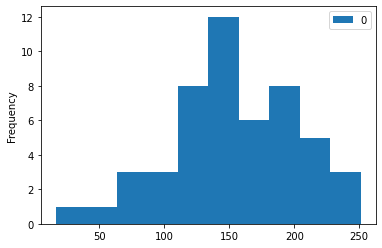

In [41]:
# Histogram
pd.DataFrame(olcumler).plot.hist();

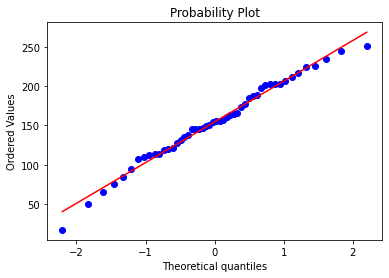

In [42]:
## qqplot
stats.probplot(olcumler,dist = "norm", plot=pylab)
pylab.show()

In [43]:
# Shapiro-Wilks Testi

H0: Örnek dağılımı ile teorik normal dağılım arasında istatistiksel olarak anlamlı bir farklılık **yoktur**

H1: Örnek dağılımı ile teorik normal dağılım arasında istatistiksel olarak anlamlı bir farklılık **vardır**

In [44]:
shapiro(olcumler)

ShapiroResult(statistic=0.9853105545043945, pvalue=0.7848747968673706)

In [45]:
print("T Hesap İstatistiği: " + str(shapiro(olcumler)[0]))
print("Hesaplanan P-value: " + str(shapiro(olcumler)[1]))

T Hesap İstatistiği: 0.9853105545043945
Hesaplanan P-value: 0.7848747968673706


**pvalue = 0.7** > **pvalue = 0.05** olduğu için H0 **reddedilemez**

## Tek Örneklem T Testi Uygulaması

In [46]:
# Hipotez Testinin Uygulanması

In [47]:
stats.ttest_1samp(olcumler,popmean= 170)

Ttest_1sampResult(statistic=-2.1753117985877966, pvalue=0.034460415195071446)

H0: Web sitesinde geçirilen ortalama süre 170 saniyedir.

H1: Web sitesinde geçirilen ortalama süre 170 saniye değildir.

**pvalue = 0.03** < **pvalue = 0.05** olduğu için H0 reddedilir

Sonuç: Web siteisnde geçirilen süre 170 saniye değildir. Daha azdır.

# Nonparametrik Tek Örneklem Testi
Eldeki örnekte parametrik olduğu için ve normallik varsayımı sağlandığı için bu testi yapmaya gerek yoktur

In [48]:
olcumler = np.array([17, 160, 234, 149, 145, 107, 197, 75, 201, 225, 211, 119, 
              157, 145, 127, 244, 163, 114, 145,  65, 112, 185, 202, 146,
              203, 224, 203, 114, 188, 156, 187, 154, 177, 95, 165, 50, 110, 
              216, 138, 151, 166, 135, 155, 84, 251, 173, 131, 207, 121, 120])

In [49]:
sign_test(olcumler,170)

(-7.0, 0.06490864707227217)

# Tek Örneklem Oran Testi

Oransal bir ifade test edilmek istenildiğinde kullanılır

**Hipotezler:**

<d><i>H</i><sub>0</sub>: <i>p</i> = <i>P</i><sub>0</sub></d>   
<d><i>H</i><sub>1</sub>: <i>p</i> ≠ <i>P</i><sub>0</sub></d><br><br>

<d><i>H</i><sub>0</sub>: <i>P</i> <= <i>P</i><sub>0</sub></d><br>
<d><i>H</i><sub>1</sub>: <i>P</i> > <i>P</i><sub>0</sub></d><br><br>

<d><i>H</i><sub>0</sub>: <i>P</i> >= <i>P</i><sub>0</sub></d><br>
<d><i>H</i><sub>1</sub>: <i>P</i> < <i>P</i><sub>0</sub></d><br><br>

**Test İstatistiği**

${\displaystyle t={\frac {{\hat {p}}-p _{0}}{\sqrt {\frac {p _{0} (1-p _{0})}{n}}}}}$

**Varsayım**

${\displaystyle n > 30}$

# İş Uygulaması: Dönüşüm Oranı Testi

Bir yazılım ve bir mecrada reklam verilmiş ve bu reklama ilişkin yazılım tarafından 0.125 dönüşüm oranı elde edildiği ifade edilmiş. 

Fakat bu durum kontrol edilmek isteiyor. 

Çünkü bu yüksek bir oran ve gelirler incelendiğinde örtüşmüyor.

* 500 kişi dış mecrada alışveriş yapmış, 40 kişi sitemize gelip alışveriş yapmış.
* Örnek üzerinden elde edilen dönüşüm oranı: 40/500 = 0.08

HO: p = 0.125 

H1: p != 0.125

In [50]:
count = 40
n_obs = 500
value = 0.125

In [52]:
propz(count, n_obs, value)

(-3.7090151628513017, 0.0002080669689845979)

**pvalue = 0.0002** < **pvalue = 0.05** olduğu için H0 reddedilir

# Bağımsız İki Örneklem T Testi (AB Testi)

İki grup ortalaması arasında karşılaştırma yapılmak istenildiğinde kullanılır

**Hipotezler:**

<d><i>H</i><sub>0</sub>: <i>μ</i><sub>1</sub> = <i>μ</i><sub>2</sub></d><br>
<d><i>H</i><sub>1</sub>: <i>μ</i><sub>1</sub> ≠ <i>μ</i><sub>2</sub></d><br><br>

<d><i>H</i><sub>0</sub>: <i>μ</i><sub>1</sub> <= <i>μ</i><sub>2</sub></d><br>
<d><i>H</i><sub>1</sub>: <i>μ</i><sub>1</sub> > <i>μ</i><sub>2</sub></d><br><br>

<d><i>H</i><sub>0</sub>: <i>μ</i><sub>1</sub> >= <i>μ</i><sub>2</sub></d><br>
<d><i>H</i><sub>1</sub>: <i>μ</i><sub>1</sub> < <i>μ</i><sub>2</sub></d><br><br>


**Örnek sayıları aynı, varyanslar homojen ise**

${\displaystyle t={\frac {{\bar {x _{1}}} - {\bar {x _{2}}}}{s _{p}{\sqrt {\frac {2}{n}}}}}  ,  s_{p} = {\sqrt {\frac {s^{2}x _{1} + s^{2}x _{2}}{2}}}}$


**Örnek sayıları farklı, varyanslar homojen ise**

${\displaystyle t={\frac {{\bar {x _{1}}} - {\bar {x _{2}}}}{s _{p}{\sqrt {\frac {1}{n _{1}}+{\frac {1}{n _{2}}}}}}}  ,  s_{p} = {\sqrt {\frac {(n _{1}-1){s^{2}x _{1} + (n _{2}-1)s^{2}x _{2}}}{{n _{1} + n _{2} - 2}}}}}$


**Örnek sayıları farklı, varyanslar homojen değil ise**

${\displaystyle t={\frac {{\bar {x _{1}}} - {\bar {x _{2}}}}{{s _{\bar {\Delta}}}}} , {s _{\bar {\Delta}}} = {\sqrt {\frac {{s^{2} _{1}}}{{n _{1}}}+{\frac {{s^{2} _{2}}}{{n _{2}}}}}}}$


## Varsayımlar

* Normallik
* Varyans Homojenliği

# İş Uygulaması: ML Modelinin Başarı Testi (AB Testi)

Bir ML projesine yatırım yapılmış. <br>Ürettiği tahminler neticesinde oluşan gelir ile eski sistemin ürettiği gelirler karşılaştırılıp anlamlı farklılık olup olmadığı test edilmek isteniyor.
* Model geliştirilmiş ve web sitesine entegre edilmiş.
* Site kullanıcıları belirli bir kurala göre ikiye bölünmüş olsun.
* A grubu eski, B grubu yeni sistem.
* Gelir anlamında anlamlı iş yapılıp yapılmadığı test edilmek isteniyor.

**ML modeli anlamlı bir farklilik oluşturabildi mi?**

<d><i>H</i><sub>0</sub>: <i>μ</i><sub>1</sub> = <i>μ</i><sub>2</sub></d><br>
<d><i>H</i><sub>1</sub>: <i>μ</i><sub>1</sub> ≠ <i>μ</i><sub>2</sub></d><br><br>

In [53]:
# Veri Tipi 1

In [54]:
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,
        25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,
        32,33,33,33,31,32,33,26,32,33,29])

A_B = pd.concat([A,B],axis = 1)
A_B.columns = ["A","B"]

A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [55]:
# Veri Tipi 2 (Veri DÜzenlemesi)

In [56]:
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,
        25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,
        32,33,33,33,31,32,33,26,32,33,29])

# A ve A'nın grubu
GRUP_A = np.arange(len(A))
GRUP_A = pd.DataFrame(GRUP_A)
GRUP_A[:] = "A"
A = pd.concat([A,GRUP_A],axis = 1)

# B ve B'nin grubu
GRUP_B = np.arange(len(B))
GRUP_B = pd.DataFrame(GRUP_B)
GRUP_B[:] = "B"
B = pd.concat([B, GRUP_B], axis = 1)

# Tüm veri
AB = pd.concat([A,B])
AB.columns = ["gelir","GRUP"]
print(AB.head())
print(AB.tail())

   gelir GRUP
0     30    A
1     27    A
2     21    A
3     27    A
4     29    A
    gelir GRUP
25     33    B
26     26    B
27     32    B
28     33    B
29     29    B


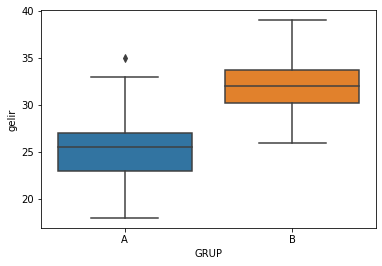

In [57]:
sns.boxplot(x = "GRUP", y = "gelir", data = AB);

## Varsayım Kontrolü

In [58]:
A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [59]:
AB.head()

,gelir,GRUP
0,30,A
1,27,A
2,21,A
3,27,A
4,29,A


In [60]:
# Normallik Varsayımı

In [61]:
shapiro(A_B.A)

ShapiroResult(statistic=0.9789242148399353, pvalue=0.7962799668312073)

In [62]:
shapiro(A_B.B)

ShapiroResult(statistic=0.9561261534690857, pvalue=0.2458445429801941)

**İki şekilde de p-değerleri 0.05 den büyük olduğu için normallik varsayımı sağlanmaktadır**

### Varyans Homojenliği

H0: Varyanslar Homojendir<br>
H1: Varyanslar Homojen Değildir

In [63]:
stats.levene(A_B.A, A_B.B)

LeveneResult(statistic=1.1101802757158004, pvalue=0.2964124900636569)

**p-değeri 0.05 den büyük olduğu için H0 reddedilemez**

## Hipotez Testi

In [64]:
stats.ttest_ind(A_B["A"], A_B["B"], equal_var = True)

Ttest_indResult(statistic=-7.028690967745927, pvalue=2.6233215605475075e-09)

In [65]:
test_istatistigi, pvalue = stats.ttest_ind(A_B["A"], A_B["B"], equal_var=True)
print(f"Test İstatistiği = {round(test_istatistigi,4)}, p-değeri = {round(pvalue,4)}")

Test İstatistiği = -7.0287, p-değeri = 0.0


**İstatistiksel olarak anlamlı bir fark vardır ve bu yeni sistemin lehinedir**

## Nonparametrik Bağımsız İki Örneklem Testi

In [66]:
stats.mannwhitneyu(A_B["A"], A_B["B"])

MannwhitneyuResult(statistic=89.5, pvalue=9.557950378612535e-08)

In [67]:
test_istatistigi2, pvalue = stats.mannwhitneyu(A_B["A"], A_B["B"])
print(f"Test İstatistiği = {round(test_istatistigi2,4)}, p-değeri = {round(pvalue,4)}")

Test İstatistiği = 89.5, p-değeri = 0.0


# Bağımlı İki Örneklem T Testi

Bağımlı iki grup ortalaması arasında karşılaştırma yapılmak istenildiğinde kullanılır.

## Hipotezler

<d><i>H</i><sub>0</sub>: <i>μ</i><sub>ö</sub> = <i>μ</i><sub>s</sub></d><br>
<d><i>H</i><sub>1</sub>: <i>μ</i><sub>ö</sub> ≠ <i>μ</i><sub>s</sub></d><br><br>

<d><i>H</i><sub>0</sub>: <i>μ</i><sub>ö</sub> <= <i>μ</i><sub>s</sub></d><br>
<d><i>H</i><sub>1</sub>: <i>μ</i><sub>ö</sub> > <i>μ</i><sub>s</sub></d><br><br>

<d><i>H</i><sub>0</sub>: <i>μ</i><sub>ö</sub> >= <i>μ</i><sub>s</sub></d><br>
<d><i>H</i><sub>1</sub>: <i>μ</i><sub>ö</sub> < <i>μ</i><sub>s</sub></d><br><br>

## Test İstatistiği

${\displaystyle t={\frac {{\bar {x _{D}}} - {\mu _{0}}}{ {\frac {s _{D}}{{\sqrt n}}}}}}$

## Varsayımlar

* Normallik
* Varyans Homojenliği

# İş Uygulaması: Şirket İçi Eğitimin Performans Etkisi Ölçümü

Belirli uğraşlar sonucunda alınan bir eğitimin katma değer sağlayıp sağlamadığı olçülmek isteniyor

* Bir departman bir konuda eğitim talep ediyor
* Gerekli/gereksiz değerlendirmeleri neticesinde eğitim alınıyor
* Eğitimden önce ve sonra olacak şekilde gerekli ölçümler yapılıyor
* Eğitim sonrasında eğitimin sağladığı katma değer test edilmek isteniyor

<d><i>H</i><sub>0</sub>: <i>μ</i><sub>ö</sub> = <i>μ</i><sub>s</sub></d><br>
<d><i>H</i><sub>1</sub>: <i>μ</i><sub>ö</sub> ≠ <i>μ</i><sub>s</sub></d><br><br>
H0: Eğitim alınmadan önce ve eğitim alındıktan sonra bir etki **gözlenmemiştir**<br>
H1: Eğitim alınmadan önce ve eğitim alındıktan sonra bir etki gözlenmiştir

In [68]:
oncesi = pd.DataFrame([123,119,119,116,123,123,121,120,117,118,121,121,123,119,
            121,118,124,121,125,115,115,119,118,121,117,117,120,120,
            121,117,118,117,123,118,124,121,115,118,125,115])

sonrasi = pd.DataFrame([118,127,122,132,129,123,129,132,128,130,128,138,140,130,
             134,134,124,140,134,129,129,138,134,124,122,126,133,127,
             130,130,130,132,117,130,125,129,133,120,127,123])

In [69]:
oncesi[0:5]

,0
0,123
1,119
2,119
3,116
4,123


In [70]:
sonrasi[0:5]

,0
0,118
1,127
2,122
3,132
4,129


In [71]:
# Veri Seti 1

In [72]:
ayrik = pd.concat([oncesi,sonrasi],axis = 1)
ayrik.columns = ["ONCESI","SONRASI"]
print(f"'AYRIK' Veri Seti: \n\n {ayrik.head()}\n\n")

'AYRIK' Veri Seti: 

    ONCESI  SONRASI
0     123      118
1     119      127
2     119      122
3     116      132
4     123      129




In [73]:
# Veri Seti 2

In [74]:
# Öncesi Flag/Tag Oluşturma

In [75]:
grup_oncesi = np.arange(len(oncesi))
grup_oncesi = pd.DataFrame(grup_oncesi)
grup_oncesi[:] = "ONCESI"

In [76]:
# Flag ve ONCESI Değerlerini Bir Araya Getirme

In [77]:
A = pd.concat([oncesi,grup_oncesi], axis = 1)

In [78]:
# Sonrası Flas/Tag Oluşturma

In [79]:
grup_sonrasi = np.arange(len(sonrasi))
grup_sonrasi = pd.DataFrame(grup_sonrasi)
grup_sonrasi[:] = "SONRASI"

In [80]:
# Flag ve SONRASI Değerlerini Bir Araya Getirme

In [81]:
B = pd.concat([sonrasi,grup_sonrasi], axis = 1)

In [82]:
# Tüm Veriyi Bir Araya Getirme

In [83]:
birlikte = pd.concat([A,B])
birlikte

,0,0
0,123,ONCESI
1,119,ONCESI
2,119,ONCESI
3,116,ONCESI
4,123,ONCESI
...,...,...
35,129,SONRASI
36,133,SONRASI
37,120,SONRASI
38,127,SONRASI


In [84]:
# İsimlendirme

In [85]:
birlikte.columns = ["PERFORMANS","ONCESI_SONRASI"]
print(f"'BIRLIKTE' Veri Seti: \n\n{birlikte.head()}\n")

'BIRLIKTE' Veri Seti: 

   PERFORMANS ONCESI_SONRASI
0         123         ONCESI
1         119         ONCESI
2         119         ONCESI
3         116         ONCESI
4         123         ONCESI



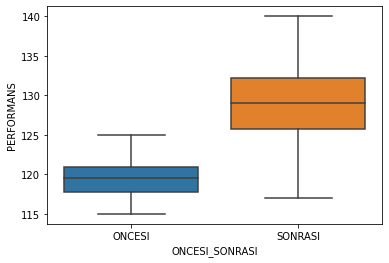

In [86]:
sns.boxplot(x = "ONCESI_SONRASI", y = "PERFORMANS", data = birlikte);

## Varsayım Kontrolleri

In [87]:
shapiro(ayrik.ONCESI)

ShapiroResult(statistic=0.9543654918670654, pvalue=0.10722342133522034)

**p-değeri 0.05 den büyük olduğu için H0 reddedilemez. Dağılım Normaldir**

In [88]:
shapiro(ayrik.SONRASI)

ShapiroResult(statistic=0.9780087471008301, pvalue=0.6159457564353943)

**p-değeri 0.05 den büyük olduğu için H0 reddedilemez. Dağılım Normaldir**

### Varyans Homojenliği

In [89]:
stats.levene(ayrik.ONCESI, ayrik.SONRASI)

LeveneResult(statistic=8.31303288672351, pvalue=0.0050844511807370246)

**p-değeri 0.05 den küçük olduğu için H0 reddedilir. Varyans Homojenliği sağlanmamaktadır**
<br>
Ne yapılması Gerekir?

* Aykırı veriler düzenlenebilir
* Tolerans gösterilebilir

## Hipotez Testi

In [90]:
stats.ttest_rel(ayrik.ONCESI, ayrik.SONRASI)

Ttest_relResult(statistic=-9.281533480429937, pvalue=2.0235251764440722e-11)

In [91]:
test_istatistigi, pvalue = stats.ttest_rel(ayrik["ONCESI"], ayrik["SONRASI"])
print(f"Test İstatistiği = {round(test_istatistigi,4)}, p-değeri = {round(pvalue,4)}")

Test İstatistiği = -9.2815, p-değeri = 0.0


**p-değeri 0.05 den büyük olduğu için H0 reddedilir. Eğitim Verimli Olmuştur**

## Nonparametrik Bağımlı İki Örneklem Testi

In [92]:
stats.wilcoxon(ayrik.ONCESI, ayrik.SONRASI)

WilcoxonResult(statistic=15.0, pvalue=2.491492033374464e-07)

In [93]:
test_istatistigi, pvalue = stats.wilcoxon(ayrik["ONCESI"], ayrik["SONRASI"])
print(f"Test İstatistiği = {round(test_istatistigi,4)}, p-değeri = {round(pvalue,4)}")

Test İstatistiği = 15.0, p-değeri = 0.0


# İki Örneklem Oran Testi

İki oran arasında karşılaştırma yapma için kullanılır

## Hipotezler

<d><i>H</i><sub>0</sub>: <i>P</i><sub>1</sub> = <i>P</i><sub>2</sub></d><br>
<d><i>H</i><sub>1</sub>: <i>P</i><sub>1</sub> ≠ <i>P</i><sub>2</sub></d><br><br>

<d><i>H</i><sub>0</sub>: <i>P</i><sub>1</sub> <= <i>P</i><sub>2</sub></d><br>
<d><i>H</i><sub>1</sub>: <i>P</i><sub>1</sub> > <i>P</i><sub>2</sub></d><br><br>

<d><i>H</i><sub>0</sub>: <i>P</i><sub>1</sub> >= <i>P</i><sub>2</sub></d><br>
<d><i>H</i><sub>1</sub>: <i>P</i><sub>1</sub> < <i>P</i><sub>2</sub></d><br><br>

## Test İstatistiği

${\displaystyle Z _{h}={\frac {p _{1} -  p _{2}}{\sqrt {p(1-p){(\frac {1}{n _{1}}}+{\frac {1}{n _{2}}})}}}}$

## Varsayımlar

* <i>n</i><sub>1</sub> > <i>30</i></d><br>
* <i>n</i><sub>2</sub> > <i>30</i></d><br><br>

# İş Uygulaması: Kullanıcı Arayüzü Deneyi (AB Testi)

In [94]:
basari_sayisi = np.array([300, 250])
gozlem_sayisi = np.array([1000, 1100])

In [95]:
propz(count = basari_sayisi, nobs = gozlem_sayisi)

(3.7857863233209255, 0.0001532232957772221)

**p-değeri 0.05 den büyük olduğu için H0 reddedilir. İstatistiksel olarak anlamlı bir fark vardır. Buton renklerinin kullanıcı davranışlarına etkisi vardır ve yeşil butonun lehine olur.**

# Varyans Analizi

İki ya da daha fazla grup arasında istatistiksel olarak anlamlı farklılık olup olmadığı öğrenilmek istenildiğinde kullanılır

<d><i>H</i><sub>0</sub>: <i>μ</i><sub>1</sub> = <i>μ</i><sub>2</sub> = <i>μ</i><sub>2</sub></d><br>
<d><i>H</i><sub>1</sub>: Eşit değillerdir (en az birisi farklıdır)</d>

## Test İstatistiği

${\displaystyle F _{s} = {\frac {MS _{(between)}}{MS _(within)}}}$

## Varsayımlar
* Gözlemlerin birbirinden bağımsız olması (grupların)
* Normal dağılım
* Varyans homojenliği

# İş Uygulaması: Anasayfa İçerik Stratejisi Belirlemek

Anasayfada geçirilen süre artırılmak isteniyor
* Bir web sitesi için başarı kriterleri: ortalama ziyaret süresi, hemen çıkış oranı vb.
* Uzun zaman geçiren kullanıcıların reklamlara daha fazla tıkladığı ve markaya olan bağlılıkların arttığı biliniyor
* Buna yönelik olak benzer haberler, farklı resimler ya da farklı formatlarda hazırlanarak oluşturulan test gruplarına gösteriliyor.
* **A:** Doğal şekilde, **B:** Yönlendirici, **C:** İlgi Çekici

In [96]:
A = pd.DataFrame([28,33,30,29,28,29,27,31,30,32,28,33,25,29,27,31,31,30,31,34,30,32,31,34,28,32,31,28,33,29])

B = pd.DataFrame([31,32,30,30,33,32,34,27,36,30,31,30,38,29,30,34,34,31,35,35,33,30,28,29,26,37,31,28,34,33])

C = pd.DataFrame([40,33,38,41,42,43,38,35,39,39,36,34,35,40,38,36,39,36,33,35,38,35,40,40,39,38,38,43,40,42])

dfs = [A, B, C]

ABC = pd.concat(dfs, axis = 1)
ABC.columns= ["GRUP_A", "GRUP_B", "GRUP_C"]
ABC.head()

,GRUP_A,GRUP_B,GRUP_C
0,28,31,40
1,33,32,33
2,30,30,38
3,29,30,41
4,28,33,42


## Varsayım Kontrolü

In [97]:
shapiro(ABC["GRUP_A"])

ShapiroResult(statistic=0.9697431921958923, pvalue=0.5321715474128723)

In [98]:
shapiro(ABC["GRUP_B"])

ShapiroResult(statistic=0.9789854884147644, pvalue=0.7979801297187805)

In [99]:
shapiro(ABC["GRUP_C"])

ShapiroResult(statistic=0.9579201340675354, pvalue=0.273820161819458)

**Üç test içinde p-value değeri 0.05 den büyük olduğu için H0 reddedilemez. Normallik varsayımı sağlanmaktadır**

### Varyans Homojenliği

In [100]:
stats.levene(ABC["GRUP_A"], ABC["GRUP_B"], ABC["GRUP_C"])

LeveneResult(statistic=1.0267403645055275, pvalue=0.3624711011741707)

**p-value değeri 0.05 den büyük olduğu için H0 reddedilemez. Varyanslar Homojendir**

## Hipotez Testi

In [101]:
result = f_oneway(ABC["GRUP_A"], ABC["GRUP_B"], ABC["GRUP_C"])
result

F_onewayResult(statistic=74.69278140730431, pvalue=1.307905074681148e-19)

In [102]:
print(f"{(round(result[1],5))}")

0.0


**p-value değeri 0.05 den küçük olduğu için H0 reddedilir. İstatistiksel olarak anlamlı bir farklılık vardır**

In [103]:
ABC.describe().T

,count,mean,std,min,25%,50%,75%,max
GRUP_A,30.0,30.133333,2.224214,25.0,28.25,30.0,31.75,34.0
GRUP_B,30.0,31.700000,2.937862,26.0,30.00,31.0,34.00,38.0
GRUP_C,30.0,38.100000,2.808239,33.0,36.00,38.0,40.00,43.0


## Nonparametrik Hipotez Testi

In [104]:
result2 = kruskal(ABC["GRUP_A"], ABC["GRUP_B"],ABC["GRUP_C"])
result2

KruskalResult(statistic=54.19819735523783, pvalue=1.7022015426175926e-12)

In [105]:
print(f"{round(result2[1],5)}")

0.0


**p-value değeri 0.05 den küçük olduğu için H0 reddedilir. İstatistiksel olarak anlamlı bir farklılık vardır**

# Korelasyon Analizi (İlişki Analizi)

Değişkenler arasında ilişki, bu ilişkinin yönü ve şiddeti ile ilgili bilgiler sağlayan istatistiksel bit yöntemdir

* Mükemmel Pozitif Kolerasyon (1) (Doğru Orantı)
* Yüksek Pozitif Kolerasyon (0.9)
* Düşük Pozitif Kolerasyon (0.5)
* Kolerasyon Yok (0)
* Düşük Negatif Kolerasyon (-0.5) (Ters Orantı)
* Yüksek Negatif Kolerasyon (-0.9)
* Mükemmel Negatif Kolerasyon (-1)


## Hipotezler

<d><i>H</i><sub>0</sub>: <i>ρ</i> = <i>0</i></d><br>
<d><i>H</i><sub>1</sub>: <i>ρ</i> ≠ <i>0</i></d><br><br>

## Test İstatistiği

${\displaystyle r _{xy}= {\frac {\Sigma x _{i}y _{i}-n{\bar x}{\bar y}}{{\sqrt {(\Sigma x ^ 2 _{i} - n{\bar x ^2})}}{\sqrt {(\Sigma y ^ 2 _{i} - n{\bar y ^2})}}}}}$

${\displaystyle t = r{\sqrt {\frac {n-2}{1-r^2}}}}$


## Varsayımlar

* İki değişken içinde normallik varsayımı
** Varsayım sağlanıyorsa Pearson Korelasyon Katsayısı
** Varsayım **sağlanmıyorsa** Spearman Korelasyon Katsayısı

# İş Uygulaması: Bahşiş ile Hesap Arasındaki İlişkinin İncelenmesi

Bahşiş ile ödenen hesap arasında korelasyon var mı?

Bahşiş veri seti:
    
    
total_bill: yemeğin toplam fiyatı (bahşiş ve vergi dahil)

tip: bahşiş

sex: ücreti ödeyen kişinin cinsiyeti (0=male, 1=female)

smoker: grupta sigara içen var mı? (0=No, 1=Yes)

day: gün (3=Thur, 4=Fri, 5=Sat, 6=Sun)

time: ne zaman? (0=Day, 1=Night)

size: grupta kaç kişi var?

In [106]:
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [107]:
# Bahşiş ve vergiler dahil olduğu için bahşiş çıkarılır
df["total_bill"] = df["total_bill"] - df["tip"]
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,15.98,1.01,Female,No,Sun,Dinner,2
1,8.68,1.66,Male,No,Sun,Dinner,3
2,17.51,3.50,Male,No,Sun,Dinner,3
3,20.37,3.31,Male,No,Sun,Dinner,2
4,20.98,3.61,Female,No,Sun,Dinner,4


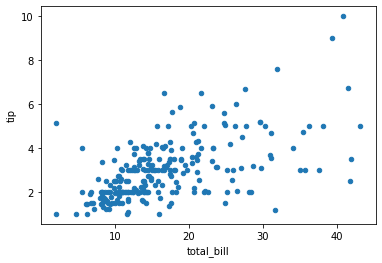

In [108]:
df.plot.scatter("total_bill","tip");

## Varsayım Kontrolü

In [109]:
test_istatistigi , pvalue = shapiro(df["tip"])
print(f"'tip' için test istatistiği: {round(test_istatistigi,5)}, p-değeri: {round(pvalue,5)}")

test_istatistigi2, pvalue2 = shapiro(df["total_bill"])
print(f"'total_bill' için test istatistiği: {round(test_istatistigi2,5)}, p-değeri: {round(pvalue2,5)}")

'tip' için test istatistiği: 0.89781, p-değeri: 0.0
'total_bill' için test istatistiği: 0.91357, p-değeri: 0.0


**p-value değeri 0.05 den küçük olduğu için H0 reddedilir. Örnek dağılım ile normal dağılım arasında istatistiksel olarak anlamlı bir fark vardır.**

## Hipotez Testi

### Korelasyon Katsayısı

In [110]:
# Pearson korelasyon katsayısı
df["tip"].corr(df["total_bill"])

0.5766634471096374

In [111]:
# Spearman korelasyon katsayısı
df["tip"].corr(df["total_bill"], method = "spearman")

0.593691939408997

* Değişkenler arasında pozitif yönlü ilişki vardır
* İlişkinin yönü orta şiddetlidir

### Korelasyonun Anlamlılığının Testi

In [112]:
test_istatistigi3, pvalue3 = pearsonr(df["tip"],df["total_bill"])

print(f"Korelasyon Katsayısı = {round(test_istatistigi3,4)}, p-değeri = {round(pvalue3,4)}")

Korelasyon Katsayısı = 0.5767, p-değeri = 0.0


**p-value değeri 0.05 den küçük olduğu için H0 reddedilir. İstatistiksel olarak anlamlı bir fark vardır.**

## Nonparametrik Hipotez Testi

In [113]:
stats.spearmanr(df["tip"], df["total_bill"])

SpearmanrResult(correlation=0.593691939408997, pvalue=1.2452285137560276e-24)

In [114]:
test_istatistigi4, pvalue4 = stats.spearmanr(df["tip"],df["total_bill"])

print(f"Korelasyon Katsayısı = {round(test_istatistigi4,4)}, p-değeri = {round(pvalue4,4)}")

Korelasyon Katsayısı = 0.5937, p-değeri = 0.0


**p-value değeri 0.05 den küçük olduğu için H0 reddedilir. Örnek dağılım ile normal dağılım arasında istatistiksel olarak anlamlı bir fark vardır.**
* Pozitif yönlüdür
* Orta şiddete sahiptir

In [115]:
test_istatistigi5, pvalue5 = stats.kendalltau(df["tip"],df["total_bill"])

print(f"Korelasyon Katsayısı = {round(test_istatistigi5,4)}, p-değeri = {round(pvalue5,4)}")

Korelasyon Katsayısı = 0.4401, p-değeri = 0.0
